In [491]:
import pandas as pd
import numpy as np
import matplotlib as plt

1=combine the two fies in one

In [492]:
df1=pd.read_csv('day_1.csv')
df2=pd.read_csv('day_2.csv')

In [493]:
df=pd.concat([df1,df2],axis=0,ignore_index=True)
df.head()

,batch,glucose conc [g/l],biomass conc [g/l],DO [mg/l],gluconic acid conc [g/l],DO [g/l]
0,1,100.0,1.0,10.0,6.416,NaN
1,2,150.0,2.0,10.0,48.015,NaN
2,3,120.0,2.0,15.0,27.100,NaN
3,4,150.0,2.5,15.0,57.946,NaN
4,5,150.0,3.0,15.0,57.389,NaN


In [494]:
df.tail()

,batch,glucose conc [g/l],biomass conc [g/l],DO [mg/l],gluconic acid conc [g/l],DO [g/l]
42,42,180.0,2.5,NaN,174.483,0.060
43,43,150.0,3.0,NaN,154.230,0.055
44,44,166.0,3.0,NaN,169.450,0.060
45,45,165.0,-3.0,NaN,167.910,0.060
46,46,162.0,3.0,NaN,164.870,0.060


In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   batch                     47 non-null     int64  
 1   glucose conc [g/l]        45 non-null     float64
 2   biomass conc [g/l]        45 non-null     float64
 3   DO [mg/l]                 25 non-null     float64
 4   gluconic acid conc [g/l]  47 non-null     float64
 5   DO [g/l]                  20 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 2.3 KB


2=cleaning data

In [496]:
df.isna().sum()

batch                        0
glucose conc [g/l]           2
biomass conc [g/l]           2
DO [mg/l]                   22
gluconic acid conc [g/l]     0
DO [g/l]                    27
dtype: int64

In [497]:
df.duplicated().sum()

1

In [498]:
outliers=df < 0
outliers.sum()

batch                       0
glucose conc [g/l]          0
biomass conc [g/l]          1
DO [mg/l]                   0
gluconic acid conc [g/l]    0
DO [g/l]                    0
dtype: int64

In [499]:
filtered = df['biomass conc [g/l]'] < 0
df[filtered]

,batch,glucose conc [g/l],biomass conc [g/l],DO [mg/l],gluconic acid conc [g/l],DO [g/l]
45,45,165.0,-3.0,NaN,167.91,0.06


In [500]:
df.drop(labels=45,inplace=True)

In [501]:
df.drop_duplicates(inplace=True)

In [502]:
df.dropna(subset=['glucose conc [g/l]'], inplace=True)
df.dropna(subset=['biomass conc [g/l]'], inplace=True)

In [503]:
avg_Do = df['DO [mg/l]'].mean()
df['DO [mg/l]'].fillna(avg_Do, inplace=True)
avg_Do2 = df['DO [g/l]'].mean()
df['DO [g/l]'].fillna(avg_Do2, inplace=True)

3=Validate data

In [504]:
df.dtypes

batch                         int64
glucose conc [g/l]          float64
biomass conc [g/l]          float64
DO [mg/l]                   float64
gluconic acid conc [g/l]    float64
DO [g/l]                    float64
dtype: object

In [505]:
df.duplicated().sum()

0

In [506]:
df.isna().sum()

batch                       0
glucose conc [g/l]          0
biomass conc [g/l]          0
DO [mg/l]                   0
gluconic acid conc [g/l]    0
DO [g/l]                    0
dtype: int64

In [507]:
filtered=df < 0
filtered.sum()

batch                       0
glucose conc [g/l]          0
biomass conc [g/l]          0
DO [mg/l]                   0
gluconic acid conc [g/l]    0
DO [g/l]                    0
dtype: int64

In [508]:
df.head()

,batch,glucose conc [g/l],biomass conc [g/l],DO [mg/l],gluconic acid conc [g/l],DO [g/l]
0,1,100.0,1.0,10.0,6.416,0.041471
1,2,150.0,2.0,10.0,48.015,0.041471
2,3,120.0,2.0,15.0,27.100,0.041471
3,4,150.0,2.5,15.0,57.946,0.041471
4,5,150.0,3.0,15.0,57.389,0.041471


In [509]:
df.tail()

,batch,glucose conc [g/l],biomass conc [g/l],DO [mg/l],gluconic acid conc [g/l],DO [g/l]
41,41,150.0,3.0,35.227273,152.890,0.050
42,42,180.0,2.5,35.227273,174.483,0.060
43,43,150.0,3.0,35.227273,154.230,0.055
44,44,166.0,3.0,35.227273,169.450,0.060
46,46,162.0,3.0,35.227273,164.870,0.060


In [510]:
df.to_csv('cleaned_data.csv', index=False)

4=visualization methods

In [511]:
import matplotlib.pyplot as plt

In [512]:
dfc=pd.read_csv('cleaned_data.csv')

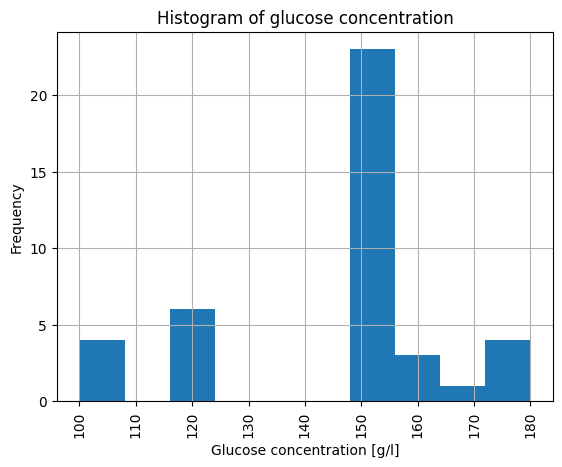

In [513]:
dfc['glucose conc [g/l]'].plot(kind='hist')
#title
plt.title('Histogram of glucose concentration')
#X-axis title
plt.xlabel('Glucose concentration [g/l]')
#X-axis ticks/labels
plt.xticks(rotation=90)
#Y-axis title
plt.ylabel('Frequency')
#show grid
plt.grid()

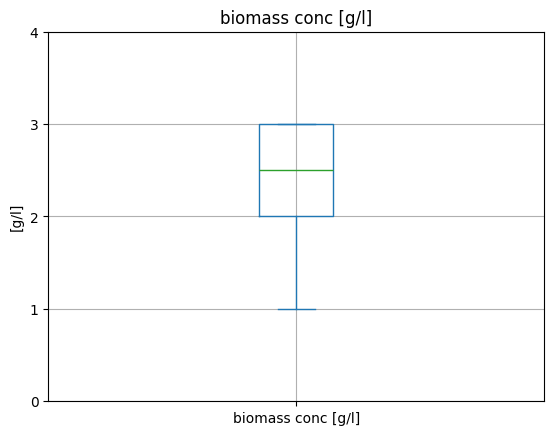

In [514]:
# box plot
dfc['biomass conc [g/l]'].plot(kind='box')
# plot title
plt.title('biomass conc [g/l]')
# Y-axis title
plt.ylabel('[g/l]')
# X-axis title
plt.yticks(range(0,5))
# show grid lines
plt.grid()

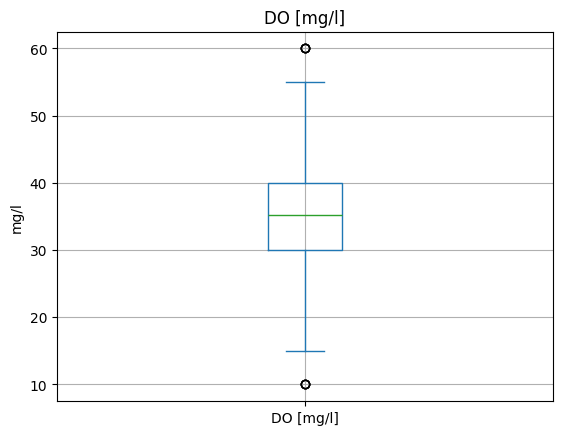

In [515]:
dfc['DO [mg/l]'].plot(kind='box')
# plot title
plt.title('DO [mg/l]')
# Y-axis title
plt.ylabel('mg/l')
# show grid lines
plt.grid()

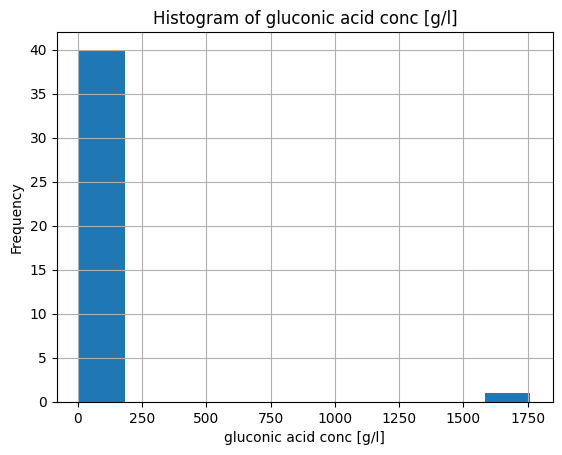

In [516]:
dfc['gluconic acid conc [g/l]'].plot(kind='hist')
#title
plt.title('Histogram of gluconic acid conc [g/l]')
#X-axis title
plt.xlabel('gluconic acid conc [g/l]')
#X-axis ticks/labels
plt.xticks(rotation=0)
#Y-axis title
plt.ylabel('Frequency')
#show grid
plt.grid()

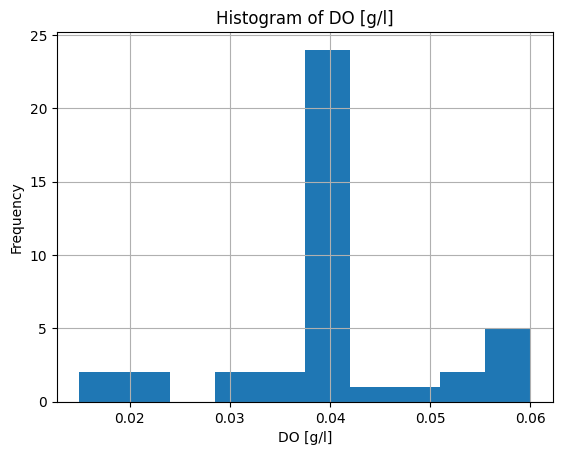

In [517]:
dfc['DO [g/l]'].plot(kind='hist')
#title
plt.title('Histogram of DO [g/l]')
#X-axis title
plt.xlabel('DO [g/l]')
#X-axis ticks/labels
plt.xticks(rotation=0)
#Y-axis title
plt.ylabel('Frequency')
#show grid
plt.grid()

5=visualization methods to study the effect of each parameter on the reaction product

In [518]:
dfc_gluconic = df.groupby('glucose conc [g/l]', as_index=False)['gluconic acid conc [g/l]'].sum()
dfc_gluconic

,glucose conc [g/l],gluconic acid conc [g/l]
0,100.0,42.718
1,120.0,236.322
2,150.0,2566.861
3,160.0,325.487
4,162.0,164.870
5,166.0,169.450
6,175.0,1760.490
7,180.0,529.072


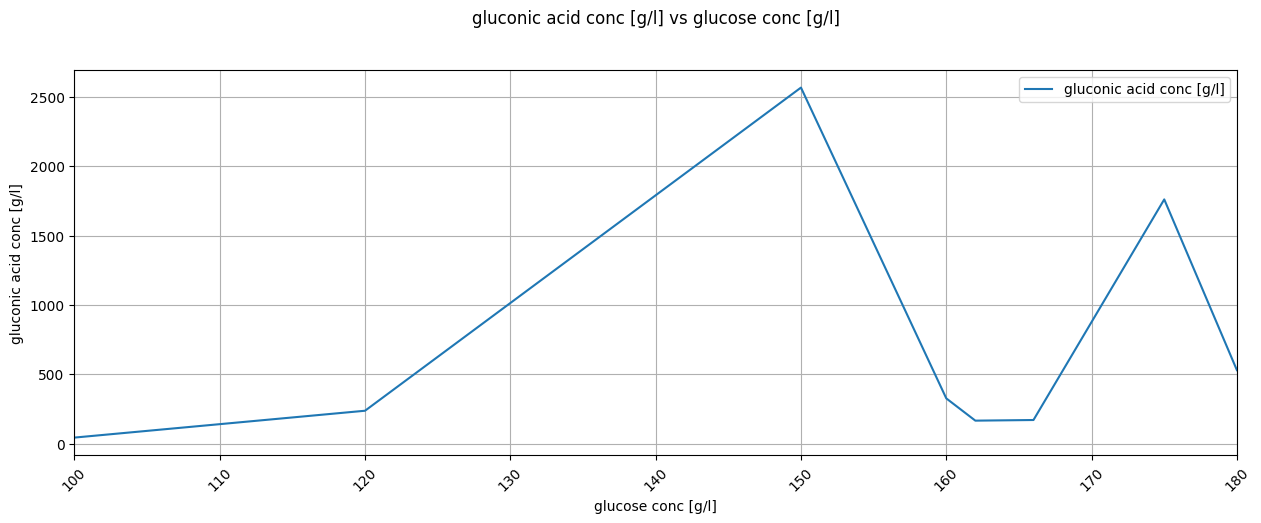

In [519]:
dfc_gluconic.plot(kind='line', figsize=(15, 5), x='glucose conc [g/l]', y='gluconic acid conc [g/l]')
# plot title
plt.title('gluconic acid conc [g/l] vs glucose conc [g/l]', y=1.1)
# X-axis title
plt.xlabel('glucose conc [g/l]')
# Y-axis title
plt.ylabel('gluconic acid conc [g/l]')
# X-axis ticks/labels
plt.xticks(rotation=45)
# set X margins to 0
plt.margins(x=0)
# show grid lines
plt.grid()


In [520]:
dfc_gluconic2 = df.groupby('biomass conc [g/l]', as_index=False)['gluconic acid conc [g/l]'].sum()
dfc_gluconic2

,biomass conc [g/l],gluconic acid conc [g/l]
0,1.0,6.416
1,2.0,1216.889
2,2.5,1216.689
3,3.0,3355.276


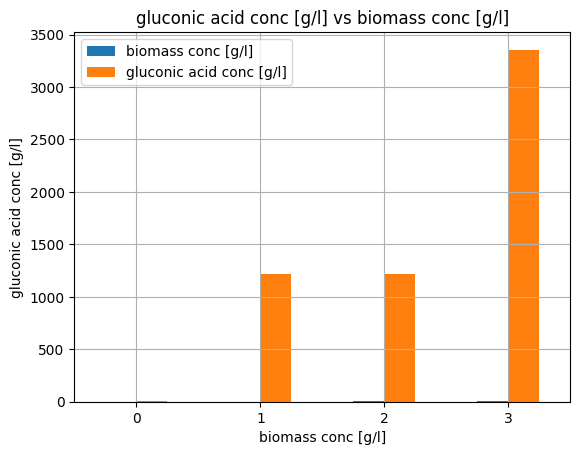

In [521]:
dfc_gluconic2.plot(kind='bar')
# plot title
plt.title('gluconic acid conc [g/l] vs biomass conc [g/l]')
# X-axis title
plt.xlabel('biomass conc [g/l]')
# Y-axis title
plt.ylabel('gluconic acid conc [g/l]')
# X-axis ticks/labels
plt.xticks(rotation=0)
# show grid lines
plt.grid()

In [522]:
dfc_gluconic3 = df.groupby('DO [mg/l]', as_index=False)['gluconic acid conc [g/l]'].sum()
dfc_gluconic3

,DO [mg/l],gluconic acid conc [g/l]
0,10.000000,84.053
1,15.000000,142.435
2,25.000000,116.748
3,30.000000,139.444
4,35.227273,2161.402
5,40.000000,257.913
6,50.000000,484.115
7,55.000000,1912.930
8,60.000000,496.230


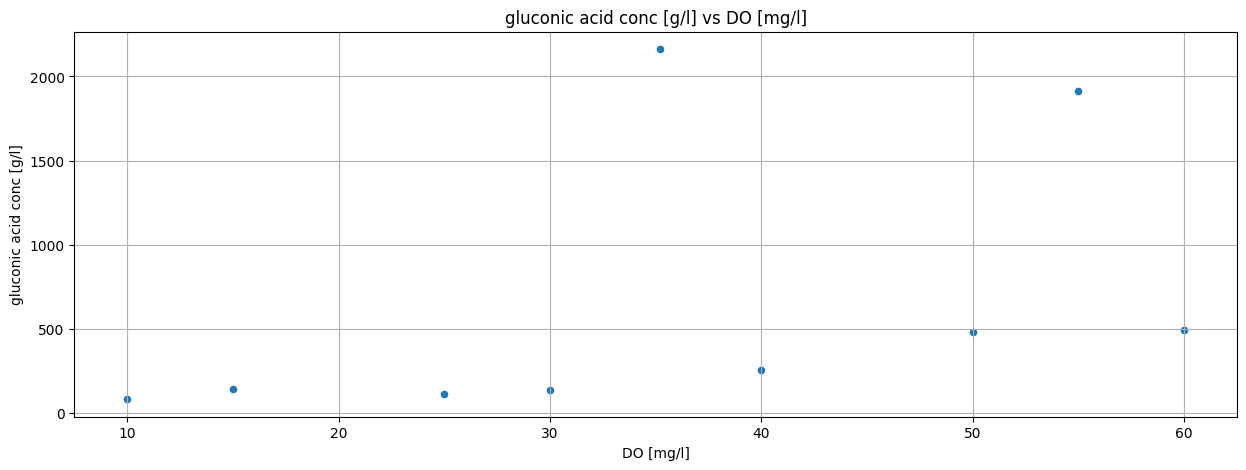

In [523]:
dfc_gluconic3.plot(kind='scatter', x='DO [mg/l]', y='gluconic acid conc [g/l]', figsize=(15, 5))
# plot title
plt.title('gluconic acid conc [g/l] vs DO [mg/l]')
# show grid lines
plt.grid()